Image Approximation with Fourier and Wavelets
=============================================

*Important:* Please read the [installation page](http://gpeyre.github.io/numerical-tours/installation_python/) for details about how to install the toolboxes.
$\newcommand{\dotp}[2]{\langle #1, #2 \rangle}$
$\newcommand{\enscond}[2]{\lbrace #1, #2 \rbrace}$
$\newcommand{\pd}[2]{ \frac{ \partial #1}{\partial #2} }$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\umax}[1]{\underset{#1}{\max}\;}$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\uargmin}[1]{\underset{#1}{argmin}\;}$
$\newcommand{\norm}[1]{\|#1\|}$
$\newcommand{\abs}[1]{\left|#1\right|}$
$\newcommand{\choice}[1]{ \left\{  \begin{array}{l} #1 \end{array} \right. }$
$\newcommand{\pa}[1]{\left(#1\right)}$
$\newcommand{\diag}[1]{{diag}\left( #1 \right)}$
$\newcommand{\qandq}{\quad\text{and}\quad}$
$\newcommand{\qwhereq}{\quad\text{where}\quad}$
$\newcommand{\qifq}{ \quad \text{if} \quad }$
$\newcommand{\qarrq}{ \quad \Longrightarrow \quad }$
$\newcommand{\ZZ}{\mathbb{Z}}$
$\newcommand{\CC}{\mathbb{C}}$
$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\EE}{\mathbb{E}}$
$\newcommand{\Zz}{\mathcal{Z}}$
$\newcommand{\Ww}{\mathcal{W}}$
$\newcommand{\Vv}{\mathcal{V}}$
$\newcommand{\Nn}{\mathcal{N}}$
$\newcommand{\NN}{\mathcal{N}}$
$\newcommand{\Hh}{\mathcal{H}}$
$\newcommand{\Bb}{\mathcal{B}}$
$\newcommand{\Ee}{\mathcal{E}}$
$\newcommand{\Cc}{\mathcal{C}}$
$\newcommand{\Gg}{\mathcal{G}}$
$\newcommand{\Ss}{\mathcal{S}}$
$\newcommand{\Pp}{\mathcal{P}}$
$\newcommand{\Ff}{\mathcal{F}}$
$\newcommand{\Xx}{\mathcal{X}}$
$\newcommand{\Mm}{\mathcal{M}}$
$\newcommand{\Ii}{\mathcal{I}}$
$\newcommand{\Dd}{\mathcal{D}}$
$\newcommand{\Ll}{\mathcal{L}}$
$\newcommand{\Tt}{\mathcal{T}}$
$\newcommand{\si}{\sigma}$
$\newcommand{\al}{\alpha}$
$\newcommand{\la}{\lambda}$
$\newcommand{\ga}{\gamma}$
$\newcommand{\Ga}{\Gamma}$
$\newcommand{\La}{\Lambda}$
$\newcommand{\si}{\sigma}$
$\newcommand{\Si}{\Sigma}$
$\newcommand{\be}{\beta}$
$\newcommand{\de}{\delta}$
$\newcommand{\De}{\Delta}$
$\newcommand{\phi}{\varphi}$
$\newcommand{\th}{\theta}$
$\newcommand{\om}{\omega}$
$\newcommand{\Om}{\Omega}$

This numerical tour overviews the use of Fourier and wavelets for image
approximation.

In [2]:
#from __future__ import division

#import numpy as np
#import scipy as scp
#import pylab as pyl
#import matplotlib.pyplot as plt

#from nt_toolbox.general import *
#from nt_toolbox.signal import *

#import warnings
#warnings.filterwarnings('ignore')

#%matplotlib inline
#%load_ext autoreload
#%autoreload 2

using PyPlot
using NtToolBox

*Note:* to measure the error of an image $f$ with its
approximation $f_M$, we use the SNR measure, defined as

$$ \text{SNR}(f,f_M) = -20\log_{10} \pa{ \frac{ \norm{f-f_M} }{ \norm{f} } },  $$

which is a quantity expressed in decibels (dB).
The higer the SNR, the better the quality.

Image Loading and Displaying
----------------------------


First we load an image $ f \in \RR^N $ of $ N = N_0 \times N_0 $ pixels.

In [3]:
n0 = 512
f = rescale(load_image("NtToolBox/src/data/lena.png", n0))

512×512 Array{Float32,2}:
 0.672897  0.672897  0.672897  0.669782  …  0.705608  0.64486   0.528037
 0.672897  0.672897  0.672897  0.669782     0.705608  0.64486   0.528037
 0.672897  0.672897  0.672897  0.669782     0.705608  0.64486   0.528037
 0.672897  0.672897  0.672897  0.669782     0.705608  0.64486   0.528037
 0.672897  0.672897  0.672897  0.669782     0.705608  0.64486   0.528037
 0.682243  0.682243  0.658879  0.64486   …  0.514019  0.415888  0.291277
 0.668224  0.668224  0.67757   0.658879     0.303738  0.224299  0.196262
 0.663551  0.663551  0.64486   0.654206     0.149533  0.17757   0.135514
 0.64486   0.64486   0.658879  0.658879     0.126168  0.135514  0.14486 
 0.64486   0.64486   0.654206  0.658879     0.135514  0.126168  0.116822
 0.649533  0.649533  0.649533  0.668224  …  0.126168  0.154206  0.154206
 0.649533  0.649533  0.649533  0.663551     0.126168  0.121495  0.140187
 0.658879  0.658879  0.654206  0.649533     0.135514  0.140187  0.149533
 ⋮                       

Display the original image.

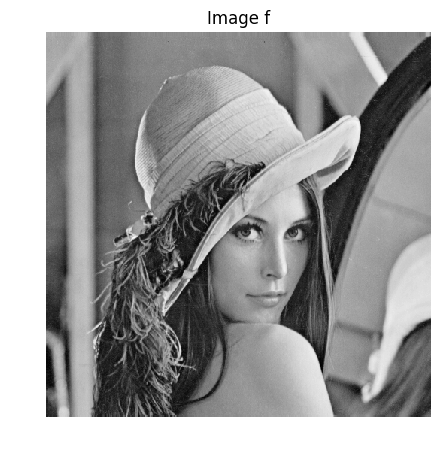

PyObject <matplotlib.text.Text object at 0x0000000023324B00>

In [4]:
figure(figsize = (5,5))
imageplot(f, "Image f")

Display a zoom in the middle.

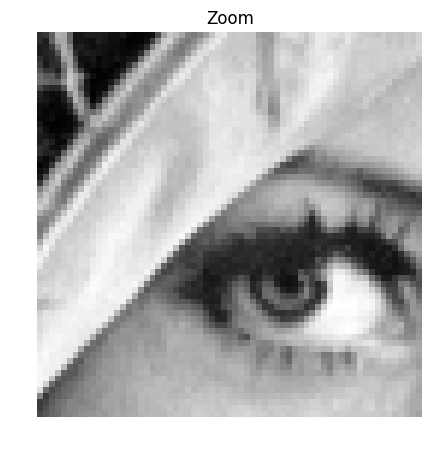

PyObject <matplotlib.text.Text object at 0x0000000002097B00>

In [5]:
figure(figsize = (5,5))
imageplot(f[Int(n0/2 - 32) : Int(n0/2 + 32), Int(n0/2 - 32) : Int(n0/2 + 32)], "Zoom")

An image is a 2D array, it can be modified as a matrix.

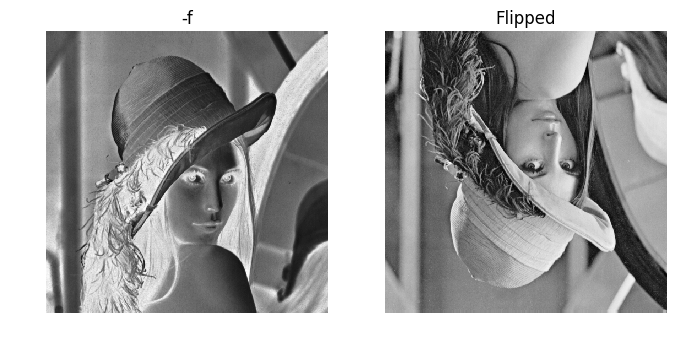

PyObject <matplotlib.text.Text object at 0x0000000023652358>

In [6]:
figure(figsize = (8,8))
imageplot(-f, "-f", [1, 2, 1])
imageplot(f[end:-1:1, :], "Flipped", [1, 2, 2])

Blurring is achieved by computing a convolution $f \star h$ with a kernel $h$.


Compute the low pass kernel.

In [7]:
k = 9; #size of the kernel
h = ones(k, k)
h = h/sum(h) #normalize

9×9 Array{Float64,2}:
 0.0123457  0.0123457  0.0123457  …  0.0123457  0.0123457  0.0123457
 0.0123457  0.0123457  0.0123457     0.0123457  0.0123457  0.0123457
 0.0123457  0.0123457  0.0123457     0.0123457  0.0123457  0.0123457
 0.0123457  0.0123457  0.0123457     0.0123457  0.0123457  0.0123457
 0.0123457  0.0123457  0.0123457     0.0123457  0.0123457  0.0123457
 0.0123457  0.0123457  0.0123457  …  0.0123457  0.0123457  0.0123457
 0.0123457  0.0123457  0.0123457     0.0123457  0.0123457  0.0123457
 0.0123457  0.0123457  0.0123457     0.0123457  0.0123457  0.0123457
 0.0123457  0.0123457  0.0123457     0.0123457  0.0123457  0.0123457

Compute the convolution $f \star h$.

In [8]:
fh = conv2(Array{Float64, 2}(f), h)

520×520 Array{Float64,2}:
 0.00830737  0.0166147   0.0249221   …  0.0231914  0.0144802  0.00651898
 0.0166147   0.0332295   0.0498442      0.0463828  0.0289604  0.013038  
 0.0249221   0.0498442   0.0747664      0.0695743  0.0434406  0.0195569 
 0.0332295   0.066459    0.0996885      0.0927657  0.0579209  0.0260759 
 0.0415369   0.0830737   0.124611       0.115957   0.0724011  0.0325949 
 0.0499596   0.0999192   0.14959     …  0.131033   0.0811315  0.0361909 
 0.0582093   0.116419    0.174455       0.139975   0.0863236  0.0386139 
 0.0664013   0.132803    0.1988         0.145687   0.0901888  0.0402869 
 0.0743625   0.148725    0.222857       0.150706   0.0936502  0.0420753 
 0.0740164   0.148033    0.221934       0.132187   0.0821699  0.0369986 
 0.0737279   0.147456    0.221068    …  0.114361   0.0714973  0.0323834 
 0.0734395   0.146879    0.220203       0.0959578  0.0602477  0.0275951 
 0.0732664   0.146533    0.219626       0.0780162  0.0493443  0.0229222 
 ⋮                       

Display.

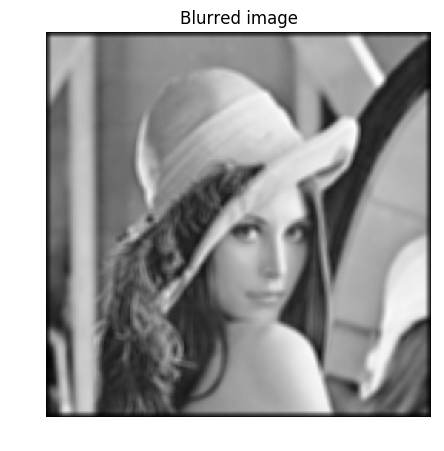

PyObject <matplotlib.text.Text object at 0x00000000237C2DA0>

In [9]:
figure(figsize = (5,5))
imageplot(fh, "Blurred image")

Fourier Transform
-----------------
The Fourier orthonormal basis is defined as
$$ \psi_m(k) = \frac{1}{\sqrt{N}}e^{\frac{2i\pi}{N_0} \dotp{m}{k} } $$
where $0 \leq k_1,k_2 < N_0$ are position indexes,
and $0 \leq m_1,m_2 < N_0$ are frequency indexes.


The Fourier transform $\hat f$ is the projection of the image on this Fourier
basis

$$ \hat f(m) = \dotp{f}{\psi_m}. $$


The Fourier transform is computed in $ O(N \log(N)) $ operation using the FFT algorithm
(Fast Fourier Transform).
Note the normalization by $\sqrt{N}=N_0$ to make the transform orthonormal.

In [10]:
F = plan_fft(f)
F = (F*f)/n0

512×512 Array{Complex{Float32},2}:
    256.476+0.0im        -3.95615+20.4749im   …   -3.95615-20.4749im 
  0.0844855-11.1962im    -15.1921+13.9858im       0.630981+7.94724im 
   -3.55624-1.76501im    -2.36528-0.595752im       7.28666-0.598839im
    4.73903+1.55932im   -0.805839-5.27302im        6.26791-6.04117im 
  -0.624841-5.30147im     1.55698-1.17529im      -0.988565+0.720974im
   -1.61084-4.77705im    0.165628-1.66687im   …   -2.28491+1.02422im 
    1.22427-0.125188im   -2.10585-2.96785im        1.15793-2.06182im 
    2.86644-0.98837im   -0.248534+1.02317im       -0.55987-1.09585im 
  -0.569311-0.075523im   0.416833-0.219624im       1.58716-0.4015im  
   0.993204-1.84695im    -1.48726-0.244343im      -1.33509+0.742391im
 -0.0138412-0.112531im  -0.682093-1.73745im   …    1.08995-0.3994im  
    0.83187-1.05805im    0.247246+0.45962im       0.700845-0.604206im
  -0.225175+0.184748im  -0.398911-0.745511im       1.23564-0.586102im
           ⋮                                  ⋱        

We check this conservation of the energy.

In [11]:
println(@sprintf("Energy of Image:   %f", norm(f)))
println(@sprintf("Energy of Fourier:   %f", norm(F)))

Energy of Image:   262.554108
Energy of Fourier:   262.554138


Compute the logarithm of the Fourier magnitude $ \log\left(\abs{\hat f(m)} +
\epsilon\right) $, for some small $\epsilon$.

In [12]:
L = fftshift(log(abs(F) + 1e-1))

512×512 Array{Float32,2}:
 -2.22263  -2.13613  -2.2846   -2.2275   …  -2.2275   -2.2846   -2.13613
 -2.20524  -2.25339  -2.26194  -2.14533     -2.2274   -2.20701  -2.16727
 -2.20634  -2.23409  -2.19394  -2.29619     -2.16088  -2.25066  -2.24465
 -2.21319  -2.28514  -2.25704  -2.25984     -2.11008  -2.19926  -2.19242
 -2.21663  -2.20098  -2.2657   -2.20428     -2.21889  -2.17542  -2.2941 
 -2.22902  -2.17697  -2.22038  -2.19271  …  -2.28654  -2.17516  -2.13996
 -2.22738  -2.1867   -2.14879  -2.20321     -2.26124  -2.20302  -2.11106
 -2.24976  -2.19271  -2.22961  -2.21817     -2.17068  -2.25378  -2.22941
 -2.16005  -2.11057  -2.27793  -2.08118     -2.22947  -2.23754  -2.28634
 -2.1473   -2.18849  -2.18699  -2.15036     -2.1783   -2.29059  -2.2841 
 -2.25382  -2.16019  -2.22127  -2.19619  …  -2.27501  -2.20996  -2.2211 
 -2.24757  -2.20535  -2.25617  -2.21006     -2.19404  -2.09374  -2.17059
 -2.17976  -2.17071  -2.13844  -2.23593     -2.26239  -2.25548  -2.21712
  ⋮                      

Display. Note that we use the function fftshift to put the 0 low frequency in the
middle.

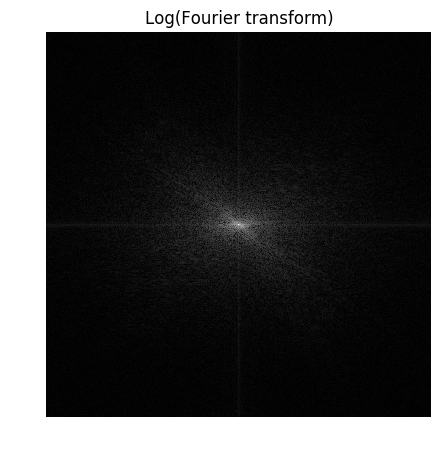

PyObject <matplotlib.text.Text object at 0x000000002545DB00>

In [13]:
figure(figsize = (5,5))
imageplot(L, "Log(Fourier transform)")

Linear Fourier Approximation
----------------------------
An approximation is obtained by retaining a certain set of index $I_M$

$$ f_M = \sum_{ m \in I_M } \dotp{f}{\psi_m} \psi_m. $$


Linear approximation is obtained by retaining a *fixed* set $I_M$
of $M = \abs{I_M}$ coefficients. The important point is that $I_M$
does not depend on the image $f$ to be approximated.


For the Fourier transform, a low pass linear approximation
is obtained by keeping only the frequencies within a square.

$$ I_M = \enscond{m=(m_1,m_2)}{ -q/2 \leq m_1,m_2 < q/2 } $$
where $ q = \sqrt{M} $.


This can be achieved by computing the Fourier transform,
setting to zero the $N-M$ coefficients outside the square $I_M$
and then inverting the Fourier transform.


Number $M$ of kept coefficients.

In [20]:
M = Base.div(n0^2, 64)

4096

__Exercise 1__

Perform the linear Fourier approximation with $M$ coefficients.
Store the result in the variable $f_M$.

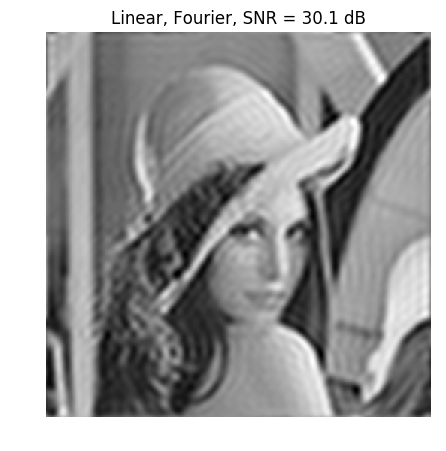

PyObject <matplotlib.text.Text object at 0x000000002D79AE10>

In [51]:
#run -i nt_solutions/introduction_4_fourier_wavelets/exo1
include("introduction_4_fourier_wavelets\ exo1.jl")

In [15]:
## Insert your code here.

Compare two 1D profile (lines of the image).
This shows the strong ringing artifact of the linea approximation.

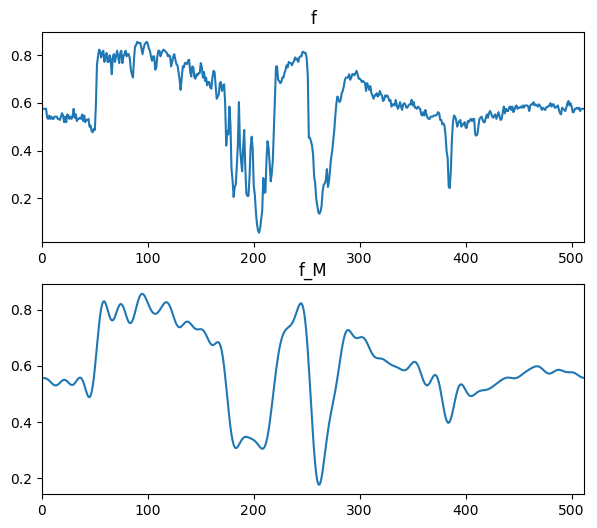

In [52]:
figure(figsize = (7, 6))

subplot(2, 1, 1)
plot(f[: , Base.div(n0, 2)])
xlim(0, n0)
title("f")

subplot(2, 1, 2)
plot(fM[: , Base.div(n0, 2)])
xlim(0, n0)
title("f_M")

show()

Non-linear Fourier Approximation
--------------------------------
Non-linear approximation is obtained by keeping the $M$ largest
coefficients. This is equivalently computed using a thresholding of the
coefficients
$$ I_M = \enscond{m}{ \abs{\dotp{f}{\psi_m}}>T }. $$


Set a threshold $T>0$.

In [53]:
T = .2

0.2

Compute the Fourier transform.

In [54]:
F = plan_fft(f)
F = (F*f)/n0

512×512 Array{Complex{Float32},2}:
    256.476+0.0im        -3.95615+20.4749im   …   -3.95615-20.4749im 
  0.0844855-11.1962im    -15.1921+13.9858im       0.630981+7.94724im 
   -3.55624-1.76501im    -2.36528-0.595752im       7.28666-0.598839im
    4.73903+1.55932im   -0.805839-5.27302im        6.26791-6.04117im 
  -0.624841-5.30147im     1.55698-1.17529im      -0.988565+0.720974im
   -1.61084-4.77705im    0.165628-1.66687im   …   -2.28491+1.02422im 
    1.22427-0.125188im   -2.10585-2.96785im        1.15793-2.06182im 
    2.86644-0.98837im   -0.248534+1.02317im       -0.55987-1.09585im 
  -0.569311-0.075523im   0.416833-0.219624im       1.58716-0.4015im  
   0.993204-1.84695im    -1.48726-0.244343im      -1.33509+0.742391im
 -0.0138412-0.112531im  -0.682093-1.73745im   …    1.08995-0.3994im  
    0.83187-1.05805im    0.247246+0.45962im       0.700845-0.604206im
  -0.225175+0.184748im  -0.398911-0.745511im       1.23564-0.586102im
           ⋮                                  ⋱        

Do the hard thresholding.

In [55]:
#abs(F) .> T
FT = F .* (abs(F) .> T)

512×512 Array{Complex{Float32},2}:
   256.476+0.0im        -3.95615+20.4749im   …   -3.95615-20.4749im 
 0.0844855-11.1962im    -15.1921+13.9858im       0.630981+7.94724im 
  -3.55624-1.76501im    -2.36528-0.595752im       7.28666-0.598839im
   4.73903+1.55932im   -0.805839-5.27302im        6.26791-6.04117im 
 -0.624841-5.30147im     1.55698-1.17529im      -0.988565+0.720974im
  -1.61084-4.77705im    0.165628-1.66687im   …   -2.28491+1.02422im 
   1.22427-0.125188im   -2.10585-2.96785im        1.15793-2.06182im 
   2.86644-0.98837im   -0.248534+1.02317im       -0.55987-1.09585im 
 -0.569311-0.075523im   0.416833-0.219624im       1.58716-0.4015im  
  0.993204-1.84695im    -1.48726-0.244343im      -1.33509+0.742391im
      -0.0-0.0im       -0.682093-1.73745im   …    1.08995-0.3994im  
   0.83187-1.05805im    0.247246+0.45962im       0.700845-0.604206im
 -0.225175+0.184748im  -0.398911-0.745511im       1.23564-0.586102im
          ⋮                                  ⋱                      

Display. Note that we use the function fftshift to put the 0 low frequency in the
middle.

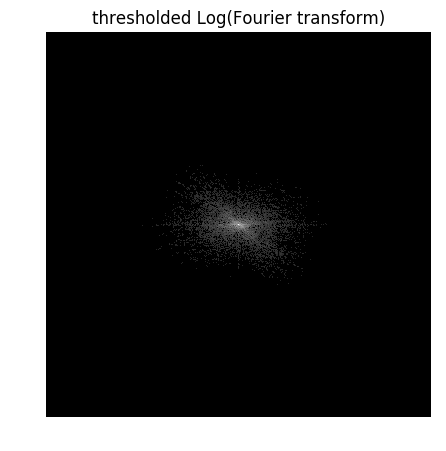

PyObject <matplotlib.text.Text object at 0x000000002DDC5A90>

In [56]:
L = fftshift(log(abs(FT) + 1e-1))
figure(figsize = (5,5))
imageplot(L, "thresholded Log(Fourier transform)")

Inverse Fourier transform to obtain $f_M$.

In [57]:
fM = plan_ifft(FT)
fM = real(n0*(fM*FT))

512×512 Array{Float32,2}:
 0.487353  0.461108  0.442373  0.436895  …  0.585559  0.548152  0.515611
 0.54188   0.529753  0.520657  0.518191     0.625147  0.585797  0.558098
 0.577563  0.580702  0.582367  0.584125     0.637712  0.600003  0.579998
 0.591426  0.61124   0.624315  0.631086     0.6142    0.58382   0.576778
 0.585582  0.623212  0.647824  0.660066     0.554214  0.537927  0.550134
 0.565794  0.621657  0.657638  0.675643  …  0.467046  0.470584  0.506988
 0.539474  0.61319   0.660248  0.683929     0.368853  0.394732  0.456941
 0.513838  0.604336  0.661789  0.689986     0.277286  0.323711  0.409414
 0.494351  0.59982   0.665919  0.695777     0.205958  0.267419  0.371379
 0.483499  0.601162  0.672627  0.699845     0.160904  0.230096  0.345998
 0.480211  0.606355  0.678847  0.699168  …  0.14001   0.210078  0.332255
 0.480526  0.61123   0.680914  0.692205     0.13511   0.201267  0.325739
 0.479675  0.612156  0.67754   0.681115     0.135659  0.195813  0.320626
 ⋮                       

Display.

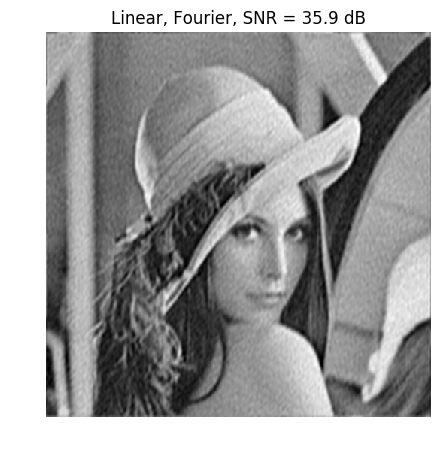

PyObject <matplotlib.text.Text object at 0x000000002E244940>

In [58]:
figure(figsize = (5,5))
imageplot(clamP(fM), @sprintf("Linear, Fourier, SNR = %.1f dB", snr(f, fM)))

Given a $T$, the number of coefficients is obtained by counting the
non-thresholded coefficients $ \abs{I_M} $.

In [59]:
m = sum(FT .!= 0)
print(@sprintf("M/N = 1/%d" ,(n0^2)/m))

M/N = 1/31

__Exercise 2__

Compute the value of the threshold $T$ so that the number of
coefficients is $M$. Display the corresponding approximation
$f_M$.

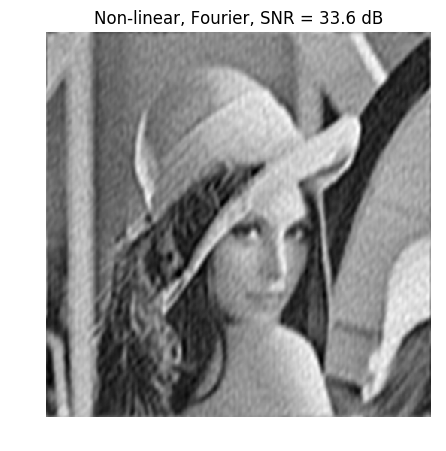

PyObject <matplotlib.text.Text object at 0x000000002E80B860>

In [71]:
#run -i nt_solutions/introduction_4_fourier_wavelets/exo2
include("introduction_4_fourier_wavelets\ exo2.jl")


In [25]:
## Insert your code here.

Wavelet Transform
-----------------
A wavelet basis $ \Bb = \{ \psi_m \}_m $
is obtained over the continuous domain by translating and
dilating three mother wavelet functions $ \{\psi^V,\psi^H,\psi^D\} $.


Each wavelet atom is defined as
$$ \psi_m(x) = \psi_{j,n}^k(x) = \frac{1}{2^j}\psi^k\pa{ \frac{x-2^j n}{2^j} } $$

The scale (size of the support) is $2^j$ and the position is
$2^j(n_1,n_2)$. The index is $ m=(k,j,n) $ for $\{ j \leq 0 \}$.


The wavelet transform computes all the inner products
$ \{ \dotp{f}{\psi_{j,n}^k} \}_{k,j,n} $.


Set the minimum scale for the transform to be 0.

In [3]:
Jmin = 0

0

Perform the wavelet transform,  $f_w$ stores all the wavelet coefficients.

In [35]:

#fw = perform_wavelet_transf(f, Jmin, + 1)
    function rescaleWav(A)
        v = maximum(abs(A))
        B = copy(A)
        if v > 0
            B = .5 .+ (.5/v).* A
            return B
        end
    end

v = maximum(abs(fw))
B = .5 .+ (.5/v).* fw
U = copy(fw)
n = size(fw)[1]
Jmax = Int(log2(n))
#    for j in collect(i for i in Jmax:-1:Jmin)
#        U[1:2 ^ j,   2 ^ j:2 ^
#            j] = rescaleWav(U[1:2 ^ j, 2 ^ j:2 ^ j]) # Peut-être que j+1 devrait être j?
#        U[2 ^ j:2 ^ j, 1:2 ^
#          j] = rescaleWav(U[2 ^ j:2 ^ j, 1:2 ^ j])
#        U[2 ^ j:2 ^ j, 2 ^ j:2 ^ j] = (
#            rescaleWav(U[2 ^ j:2 ^ j, 2 ^ j:2 ^ j]))
    # coarse scale
#        U[1:2 ^ j, 1:2 ^ j] = NtToolBox.rescale(U[1:2 ^ j, 1:2 ^ j])
#    end
#        U[1:2 ^ Jmax,   2 ^ Jmax:2 ^
#            Jmax] = rescaleWav(U[1:2 ^ Jmax, 2 ^ Jmax:2 ^ Jmax])
    for j in collect(i for i in Jmax:-1:Jmin)
        U[1:2 ^ j,   2 ^ j:2 ^
            j] = rescaleWav(U[1:2 ^ j, 2 ^ j:2 ^ j])
        U[2 ^ j:2 ^ j, 1:2 ^
          j] = rescaleWav(U[2 ^ j:2 ^ j, 1:2 ^ j])
        U[2 ^ j:2 ^ j, 2 ^ j:2 ^ j] = (
            rescaleWav(U[2 ^ j:2 ^ j, 2 ^ j:2 ^ j]))
        U[1:2 ^ j, 1:2 ^ j] = NtToolBox.rescale(U[1:2 ^ j, 1:2 ^ j])
        println(typeof(NtToolBox.rescale(U[1:2 ^ j, 1:2 ^ j])), typeof(U[1:2 ^ j, 1:2 ^ j]))


    end
#    U[1:2 ^ Jmin, 1:2 ^ Jmin] = NtToolBox.rescale(U[1:2 ^ Jmin, 1:2 ^ Jmin])

Array{Float32,2}Array{Float32,2}
Array{Float32,2}Array{Float32,2}
Array{Float32,2}Array{Float32,2}
Array{Float32,2}Array{Float32,2}
Array{Float32,2}Array{Float32,2}
Array{Float32,2}Array{Float32,2}
Array{Float32,2}Array{Float32,2}
Array{Float32,2}Array{Float32,2}


LoadError: MethodError: Cannot `convert` an object of type Void to an object of type Float32
This may have arisen from a call to the constructor Float32(...),
since type constructors fall back to convert methods.

Display the transformed coefficients.

In [5]:
figure(figsize=(10,10))

plot_wavelet(fw)
title("Wavelet coefficients")


LoadError: MethodError: Cannot `convert` an object of type Void to an object of type Float32
This may have arisen from a call to the constructor Float32(...),
since type constructors fall back to convert methods.

Wavelet Approximation
---------------------
Linear wavelet approximation with $M=2^{-j_0}$ coefficients is obtained
by keeping only the coarse scale (large support) wavelets:

$$ I_M = \enscond{(k,j,n)}{ j \geq j_0 }. $$


It corresponds to setting to zero all the coefficients excepted those
that are on the upper left corner of $f_w$.

__Exercise 3__

Perform linear approximation with $M$ wavelet coefficients.

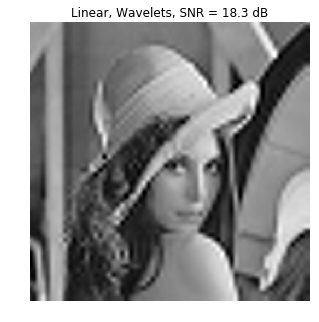

In [29]:
run -i nt_solutions/introduction_4_fourier_wavelets/exo3

In [30]:
## Insert your code here.

A non-linear approximation is obtained by keeping the $M$ largest wavelet
coefficients.


As already said, this is equivalently computed by a non-linear hard
thresholding.


Select a threshold.

In [31]:
T = .15

Perform hard thresholding.

In [32]:
fwT = np.multiply(fw,(abs(fw) > T))

Display the thresholded coefficients.

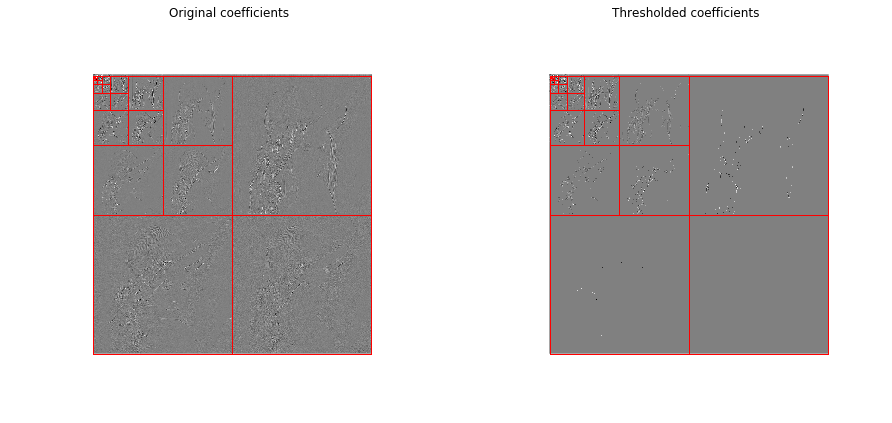

In [33]:
plt.figure(figsize=(15,15))

plt.subplot(1, 2, 1)
plot_wavelet(fw)
plt.title('Original coefficients')

plt.subplot(1, 2, 2)
plot_wavelet(fwT)
plt.title('Thresholded coefficients')

plt.show()

Perform reconstruction.

In [34]:
fM = perform_wavelet_transf(fwT, Jmin, -1)

Display approximation.

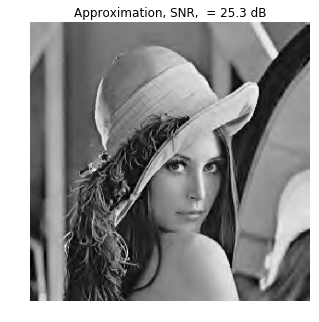

In [35]:
plt.figure(figsize=(5,5))
imageplot(clamp(fM), "Approximation, SNR,  = %.1f dB" %snr(f, fM))

__Exercise 4__

Perform non-linear approximation with $M$ wavelet coefficients by
chosing the correct value for $T$. Store the result in the variable
$f_M$.

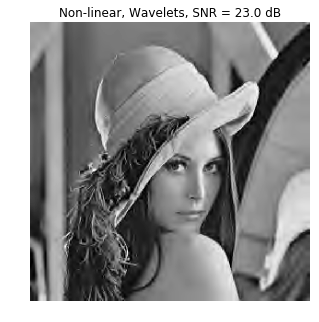

In [36]:
run -i nt_solutions/introduction_4_fourier_wavelets/exo4

In [37]:
## Insert your code here.

Compare two 1D profile (lines of the image).
Note how the ringing artifacts are reduced compared to the Fourier
approximation.

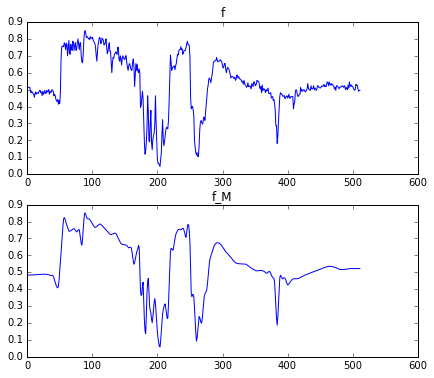

In [38]:
plt.figure(figsize=(7,6))

plt.subplot(2, 1, 1)
plt.plot(f[:,n0//2])
plt.title('f')

plt.subplot(2, 1, 2)
plt.plot(fM[:,n0//2])
plt.title('f_M')

plt.show()